 ## Machine Learning Model Training and Evaluation for Psoriasis Classification
 ### Pre-processing

#### 1. Setup and Configuration

##### _a) Library Imports_

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Markdown, display
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##### _b) Plotting Style Configuration_

In [2]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize': 10,

    'figure.autolayout': True,
    'figure.titlesize': 16,
    'figure.titleweight': 'bold',

    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
})

##### _c) Global Configuration_

In [3]:
TEST_SIZE_FRACTION = 0.2
N_TOP_VARIANCE_GENES = 5000

RANDOM_STATE = 42

#### 2. Data Loading and Initial Exploration

##### _d) Data Loading_

In [4]:
expr = pd.read_csv(
    'https://raw.githubusercontent.com/robert-jacques/INF6000-Dissertation-Psoriasis-ML/main/data/inf6000-psoriasis-transcriptomics.csv'
)

##### _e) Initial Data Overview_

In [5]:
display(Markdown('**Initial Data Overview**'))
display(expr.head())

**Initial Data Overview**

,AAAS,AAA1,AACS,AACSL,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,labels
M4277,14.3215,0.0,46.1495,0.1805,2.888,36.8135,38.932,0.255,1.321,14.4485,...,3.788,4.257,0.0745,7.9035,47.4165,8.8775,8.742,2.8155,0.000,Healthy
M4288,16.3000,0.0,30.6290,0.7050,2.165,16.2610,2.131,0.000,1.106,13.1210,...,2.889,3.799,0.1300,4.3950,72.4640,9.6750,6.377,3.4090,0.000,Healthy
M4379,15.0540,0.0,86.2350,1.0380,1.845,12.5640,106.278,0.452,0.896,17.2880,...,2.910,3.328,0.1110,5.7270,48.8300,7.5340,8.819,1.2450,0.000,Healthy
CASP1234,15.6610,0.0,38.6530,0.8810,1.786,18.5960,3.307,0.038,1.188,10.7030,...,2.651,4.025,0.0280,4.5460,69.0640,7.8070,7.220,1.4640,0.043,Healthy
M4459,13.7130,0.0,33.1190,0.0000,2.461,26.4670,0.000,0.000,0.997,11.8080,...,3.217,3.773,0.0110,8.1300,60.1000,8.0130,6.808,3.4430,0.000,Healthy


##### _f) Data Information and Statistics_

In [6]:
display(Markdown('**Data Information**'))
expr.info()

display(Markdown('<br>**Descriptive Statistics**'))
display(expr.describe())

**Data Information**

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, M4277 to M9132
Columns: 21511 entries, AAAS to labels
dtypes: float64(21099), int64(411), object(1)
memory usage: 28.6+ MB


<br>**Descriptive Statistics**

,AAAS,AAA1,AACS,AACSL,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,13.841121,0.000856,31.071307,0.317727,3.066698,20.787434,12.552612,0.070086,0.813638,12.223451,...,1.444014,2.472638,3.494986,0.106158,5.492626,57.308261,8.107210,7.178828,2.334135,0.007445
std,2.067409,0.002865,15.431330,0.224392,2.693415,9.823488,23.153142,0.227659,0.396188,2.277070,...,0.552713,0.943213,0.654739,0.079415,1.713269,16.508298,1.470688,1.969580,1.163381,0.017156
min,7.684000,0.000000,7.859000,0.000000,0.136000,2.753000,0.000000,0.000000,0.033000,3.220000,...,0.254000,0.278000,1.686000,0.000000,0.486000,25.719000,3.722000,0.916000,0.209000,0.000000
25%,12.686750,0.000000,19.490625,0.161250,1.035500,12.778250,0.032000,0.000000,0.473250,10.947000,...,0.988500,1.728500,3.030000,0.052250,4.249500,46.629250,7.259500,5.903500,1.384000,0.000000
50%,13.728000,0.000000,26.206000,0.253500,2.467500,19.455500,1.265500,0.000000,0.760000,12.082000,...,1.430000,2.417500,3.489500,0.089000,5.389500,53.372500,8.095500,6.904500,2.354500,0.000000
75%,15.165750,0.000000,38.827000,0.430250,4.280500,26.552500,14.692000,0.061000,1.102000,13.562750,...,1.891000,3.124250,3.955250,0.139750,6.805750,67.123750,9.079250,8.269000,3.218250,0.000000
max,19.619000,0.022000,86.235000,1.116000,17.608000,62.751000,135.234000,2.685000,2.019000,18.331000,...,2.849000,4.929000,5.367000,0.474000,9.366000,112.929000,12.162000,14.326000,5.975000,0.098000


##### _g) Missing Value Check_

In [7]:
missing_values_per_column = expr.isna().sum()
total_missing_values = missing_values_per_column.sum()

display(Markdown('**Missing Value Check**'))

display(Markdown('Missing values per column:'))
display(missing_values_per_column.to_frame(name='Count'))

display(
    Markdown(f'Total missing values in the dataset: {total_missing_values}')
)

**Missing Value Check**

Missing values per column:

,Count
AAAS,0
AAA1,0
AACS,0
AACSL,0
AADAC,0
...,...
ZZEF1,0
ZZZ3,0
psiTPTE22,0
tAKR,0


Total missing values in the dataset: 0

#### 3. Data Transformation and Visualisation

##### _h) Analysing Skewness (Before Transformation)_

**Descriptive Statistics of Gene Skewness (Before $\log_{2}(\mathrm{RPKM}+1)$ Transformation)**

,Skewness Statistics
count,21510.000000
mean,1.487114
std,2.062478
min,-0.893795
25%,0.414681
50%,0.849399
75%,1.637968
max,13.190906


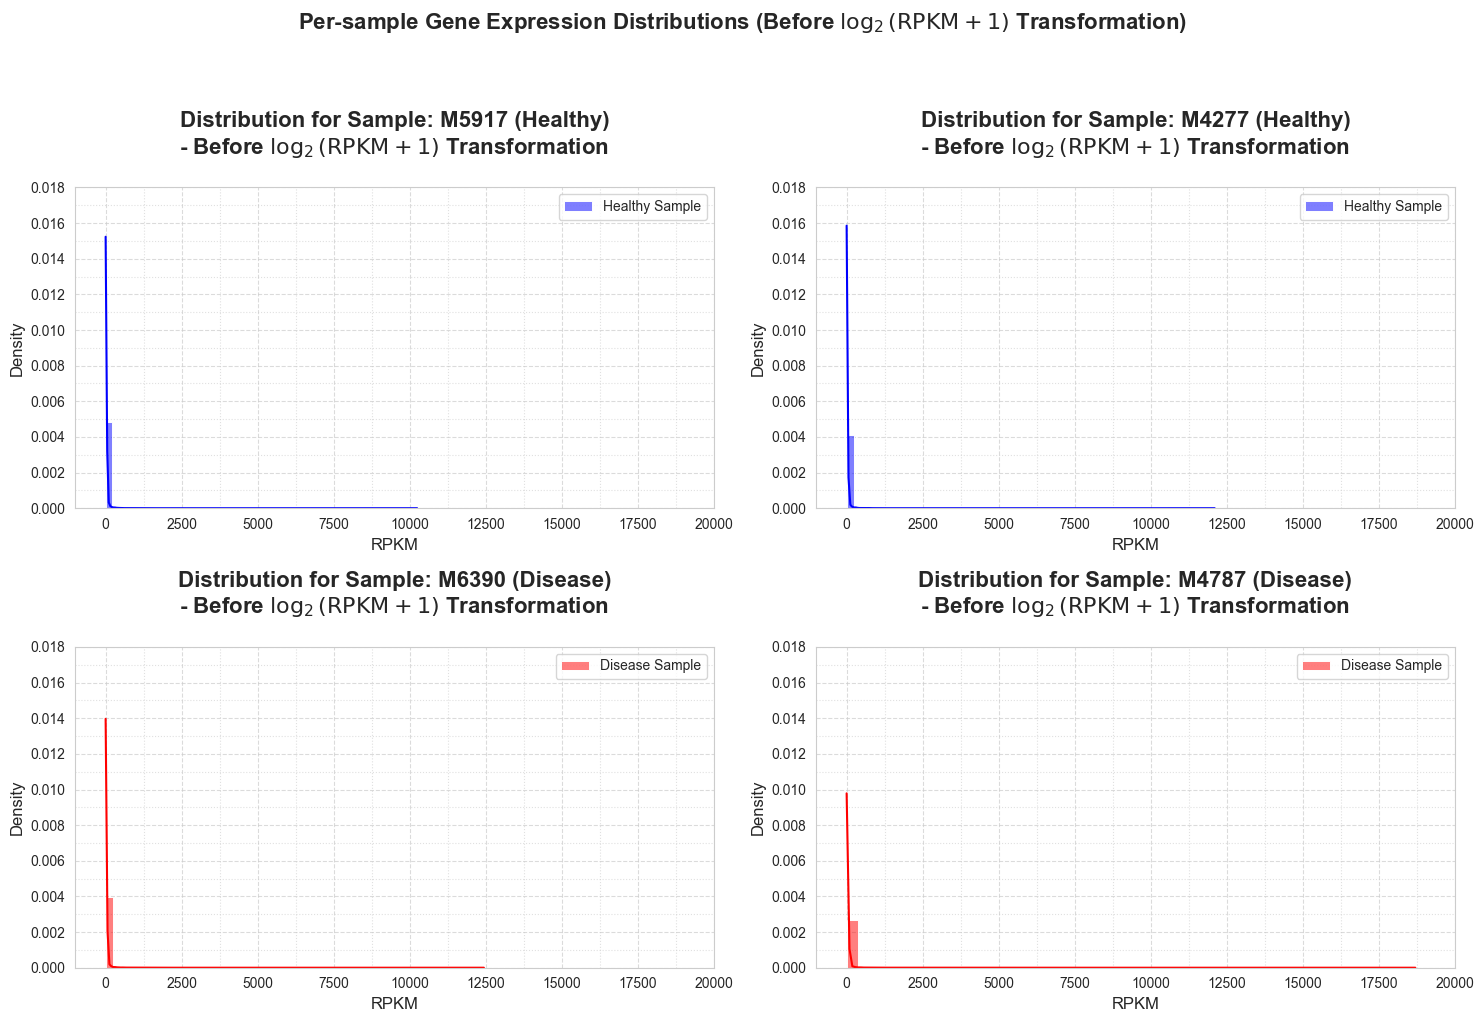

In [8]:
expr_numerical = expr.drop(columns=['labels'])
expr_numerical_skewness = expr_numerical.skew()
display(
    Markdown(r'**Descriptive Statistics of Gene Skewness (Before $\log_{2}(\mathrm{RPKM}+1)$ Transformation)**')
)
display(expr_numerical_skewness.describe().to_frame(name='Skewness Statistics'))

healthy_samples = (
    expr[expr['labels'] == 'Healthy']
    .sample(n=2, random_state=RANDOM_STATE)
    .index.tolist()
)
disease_samples = (
    expr[expr['labels'] == 'Disease']
    .sample(n=2, random_state=RANDOM_STATE)
    .index.tolist()
)
samples_to_plot = healthy_samples + disease_samples
columns_to_plot = expr_numerical.columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_id in enumerate(samples_to_plot):
    ax = axes[i]
    sample_class = expr.loc[sample_id, 'labels']
    gene_expression_values = expr_numerical.loc[
        sample_id, columns_to_plot
    ].values
    sns.histplot(
        gene_expression_values,
        kde=True,
        stat='density',
        bins=50,
        color='blue' if sample_class == 'Healthy' else 'red',
        label=f'{sample_class} Sample',
        ax=ax
    )
    ax.set_title(
        fr'Distribution for Sample: {sample_id} ({sample_class})' + '\n'
        r'- Before $\log_{2}(\mathrm{RPKM}+1)$ Transformation' + '\n'
    )
    ax.set_xlabel('RPKM')
    ax.set_ylabel('Density')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1250))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.7)
    ax.grid(which='minor', axis='both', linestyle=':', alpha=0.6)
    ax.set_xlim(-1000, 20000)
    ax.set_ylim(0, 0.018)
    ax.legend()

fig.suptitle(
    r'Per-sample Gene Expression Distributions '
    r'(Before $\log_{2}(\mathrm{RPKM}+1)$ Transformation)',
    y=1.02
)
fig.tight_layout(rect=[0, 0, 1, 0.98])
fig.savefig(
    'per-sample_gene_expression_distributions_before_log2.pdf',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

##### _i) Applying $\log_{2}(\mathrm{RPKM}+1)$ Transformation and Visualising the Detailed Result_

**Descriptive Statistics of Gene Skewness (After $\log_{2}(\mathrm{RPKM}+1)$ Transformation)**

,Skewness Statistics
count,21510.000000
mean,0.721798
std,2.145570
min,-2.651691
25%,-0.308154
50%,0.057898
75%,0.835485
max,13.190906


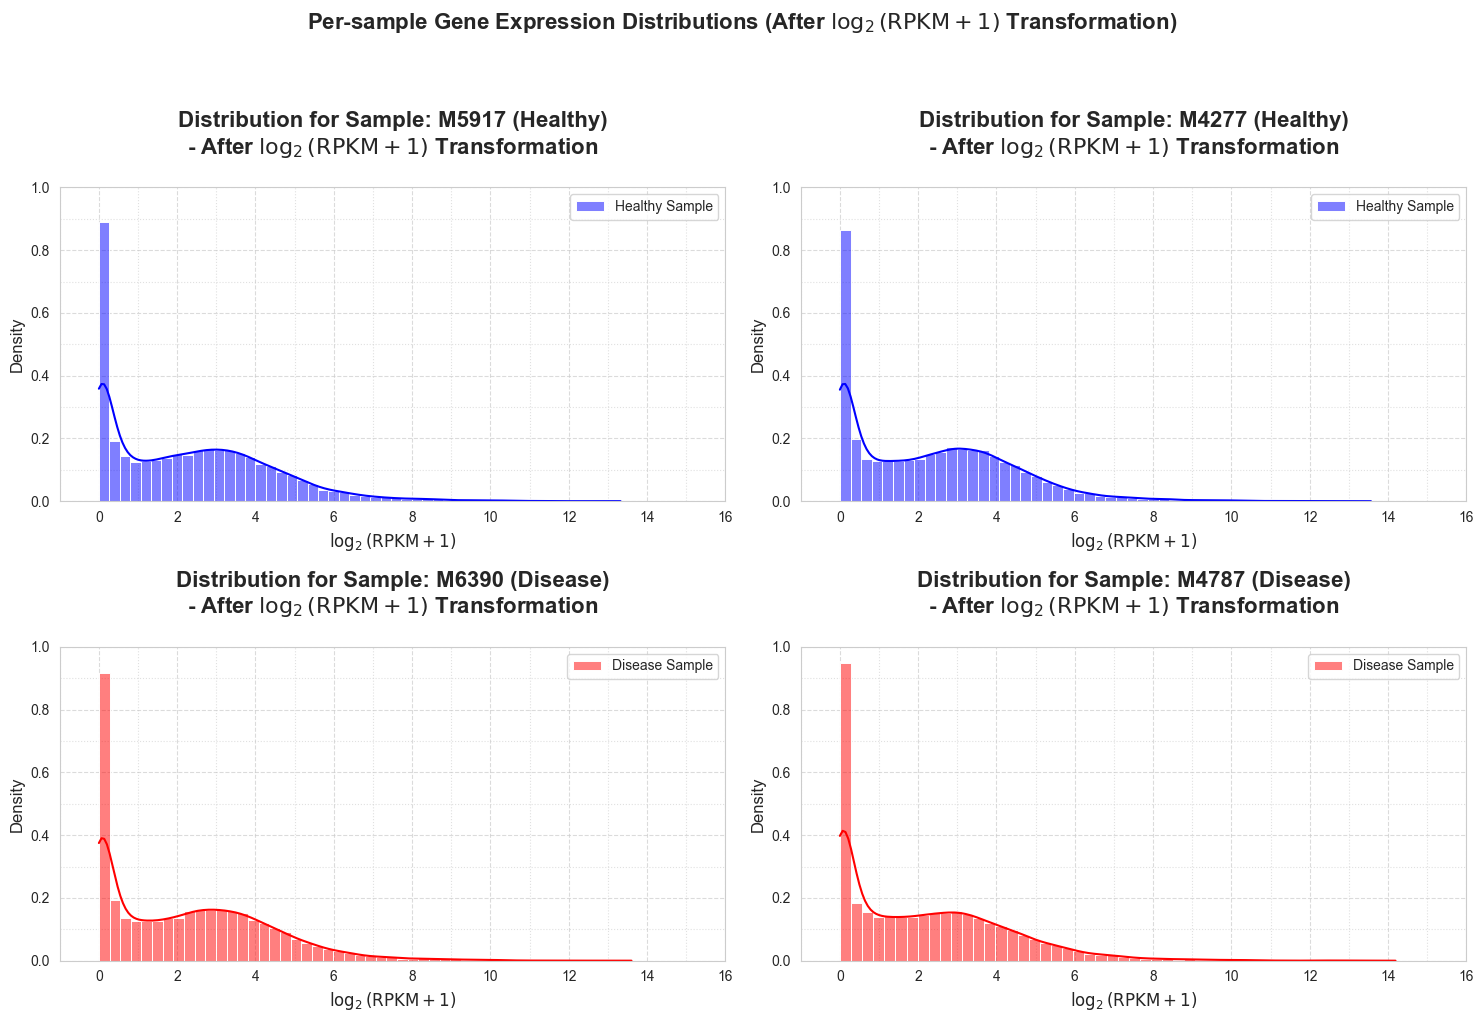

In [9]:
# The +1 is crucial to handle genes with zero expression and avoid log(0) errors.
expr_numerical_log_transformed = np.log2(expr_numerical + 1)

skewness_after = expr_numerical_log_transformed.skew().describe()

display(
    Markdown(r'**Descriptive Statistics of Gene Skewness (After $\log_{2}(\mathrm{RPKM}+1)$ Transformation)**')
)
display(skewness_after.to_frame(name='Skewness Statistics'))

columns_to_plot = expr_numerical_log_transformed.columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_id in enumerate(samples_to_plot):
    ax = axes[i]
    sample_class = expr.loc[sample_id, 'labels']
    df_transformed = expr_numerical_log_transformed
    gene_expression_values_transformed = df_transformed.loc[
        sample_id, columns_to_plot
    ].values
    sns.histplot(
        gene_expression_values_transformed,
        kde=True,
        stat='density',
        bins=50,
        color='blue' if sample_class == 'Healthy' else 'red',
        label=f'{sample_class} Sample',
        ax=ax
    )
    ax.set_title(
        fr'Distribution for Sample: {sample_id} ({sample_class})' + '\n'
        r'- After $\log_{2}(\mathrm{RPKM}+1)$ Transformation' + '\n'
    )
    ax.set_xlabel(r'$\log_{2}(\mathrm{RPKM}+1)$')
    ax.set_ylabel('Density')
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.7)
    ax.grid(which='minor', axis='both', linestyle=':', alpha=0.6)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-1, 16)
    ax.set_ylim(0, 1)
    ax.legend()

fig.suptitle(
    r'Per-sample Gene Expression Distributions '
    r'(After $\log_{2}(\mathrm{RPKM}+1)$ Transformation)',
    y=1.02
)
fig.tight_layout(rect=[0, 0, 1, 0.98])
fig.savefig(
    'per-sample_gene_expression_distributions_after_log2.pdf',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

##### _j) Visualising the Overall Transformation Summary_

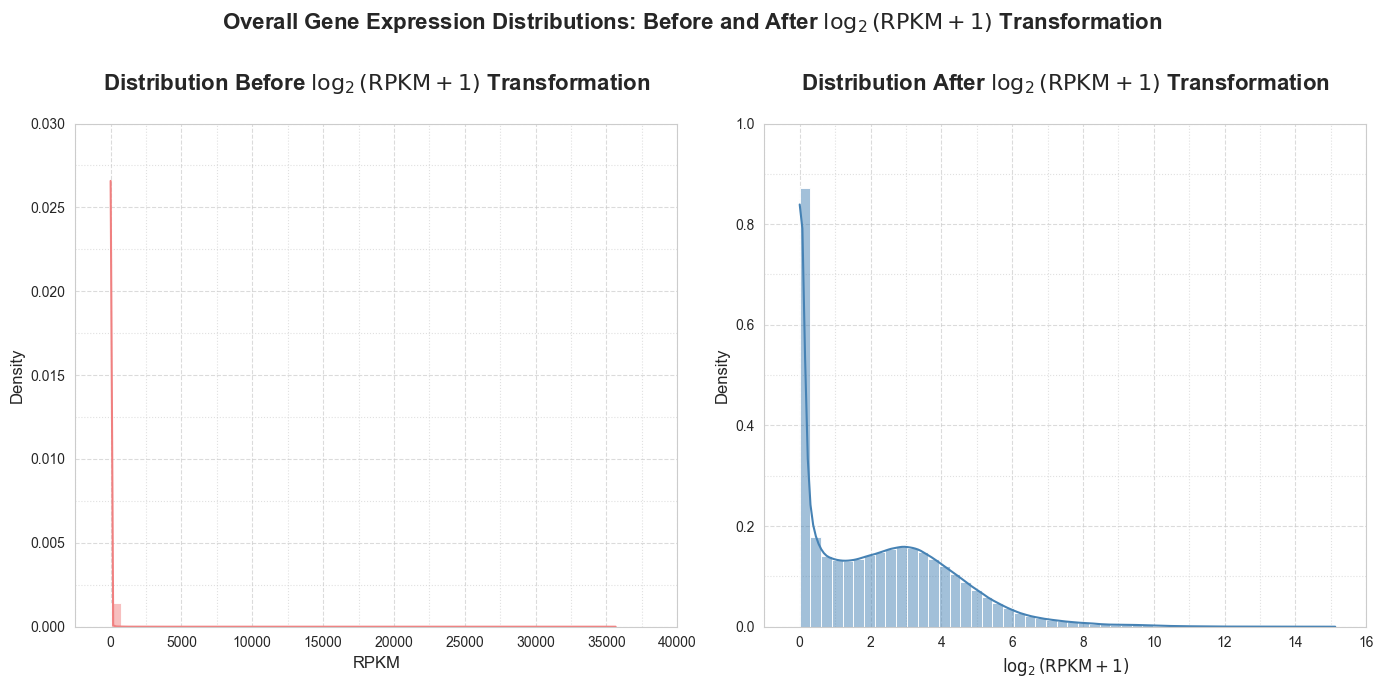

In [10]:
all_gene_values_pre_transform = expr_numerical.values.flatten()
all_gene_values_post_transform = expr_numerical_log_transformed.values.flatten()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.histplot(
    all_gene_values_pre_transform,
    kde=True,
    stat='density',
    bins=50,
    ax=axes[0],
    color='lightcoral'
)
axes[0].set_title(
    r'Distribution Before $\log_{2}(\mathrm{RPKM}+1)$ Transformation' + '\n'
)
axes[0].set_xlabel('RPKM')
axes[0].set_ylabel('Density')
axes[0].xaxis.set_minor_locator(ticker.MultipleLocator(2500))
axes[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.0025))
axes[0].grid(which='major', axis='both', linestyle='--', alpha=0.7)
axes[0].grid(which='minor', axis='both', linestyle=':', alpha=0.6)
axes[0].set_xlim(-2500, 40000)
axes[0].set_ylim(0, 0.03)

sns.histplot(
    all_gene_values_post_transform,
    kde=True,
    stat='density',
    bins=50,
    ax=axes[1],
    color='steelblue'
)
axes[1].set_title(
    r'Distribution After $\log_{2}(\mathrm{RPKM}+1)$ Transformation' + '\n'
)
axes[1].set_xlabel(r'$\log_{2}(\mathrm{RPKM}+1)$')
axes[1].set_ylabel('Density')
axes[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))
axes[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
axes[1].grid(which='major', axis='both', linestyle='--', alpha=0.7)
axes[1].grid(which='minor', axis='both', linestyle=':', alpha=0.6)
axes[1].set_xlim(-1, 16)
axes[1].set_ylim(0, 1)

fig.suptitle(
    r'Overall Gene Expression Distributions: Before and After $\log_{2}(\mathrm{RPKM}+1)$ Transformation'
)
fig.tight_layout(rect=(0, 0, 1, 0.98))
fig.savefig(
    'overall_gene_expression_distribution.pdf',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

#### 4. Feature and Dataset Preparation

##### _k) Defining Features (X) and Target (y)_

In [11]:
X_full = expr_numerical_log_transformed
mapping_dict = {'Disease': 1, 'Healthy': 0}
y_full = expr['labels'].map(mapping_dict)

display(Markdown('**Feature and Target Verification**'))

display(Markdown(
    f'* **Shape of X_full** (all log$_2$ transformed genes): `{X_full.shape}`\n'
    f'* **Shape of y_full** (encoded labels): `{y_full.shape}`\n'
    f'* **Unique values in final target vector**: `{np.unique(y_full)}`'
))

display(Markdown('Label Encoding Mapping:'))
mapping_df = pd.DataFrame(
    list(mapping_dict.items()),
    columns=['Label', 'Encoded Value']
)
display(mapping_df.style.hide(axis='index'))

**Feature and Target Verification**

* **Shape of X_full** (all log$_2$ transformed genes): `(174, 21510)`
* **Shape of y_full** (encoded labels): `(174,)`
* **Unique values in final target vector**: `[0 1]`

Label Encoding Mapping:

Label,Encoded Value
Disease,1
Healthy,0


##### _l) Train-Test Split_

In [12]:
# Stratify by y_full to maintain the same class distribution in Train and Test sets
# (crucial for potentially imbalanced datasets).
X_train, X_test, y_train, y_test = train_test_split(
    X_full,
    y_full,
    test_size=TEST_SIZE_FRACTION,
    random_state=RANDOM_STATE,
    stratify=y_full
)

display(Markdown('**Train-Test Split Verification**'))

display(Markdown('**Dataset Shapes:**'))
display(Markdown(
    f'* `X_train (before feature selection)`: `{X_train.shape}`\n'
    f'* `X_test (before feature selection)`: `{X_test.shape}`\n'
    f'* `y_train`: `{y_train.shape}`\n'
    f'* `y_test`: `{y_test.shape}`'
))

display(Markdown('**Class Distribution (Normalised):**'))
train_dist = y_train.value_counts(normalize=True).rename('Train Set')
test_dist = y_test.value_counts(normalize=True).rename('Test Set')
dist_df = pd.concat([train_dist, test_dist], axis=1)

display(dist_df.style.format('{:.4f}')
        .set_caption("Class Proportions in Train vs. Test Sets"))

**Train-Test Split Verification**

**Dataset Shapes:**

* `X_train (before feature selection)`: `(139, 21510)`
* `X_test (before feature selection)`: `(35, 21510)`
* `y_train`: `(139,)`
* `y_test`: `(35,)`

**Class Distribution (Normalised):**

,Train Set,Test Set
labels,,
1,0.5252,0.5429
0,0.4748,0.4571


##### _m) Feature Selection via Variance Thresholding_

In [13]:
train_variances_log_transformed = X_train.var()
most_variable_gene_names = (
    train_variances_log_transformed.nlargest(N_TOP_VARIANCE_GENES)
    .index.tolist()
)
X_train_select = X_train[most_variable_gene_names]
X_test_select = X_test[most_variable_gene_names]

display(Markdown('**Feature Selection Verification**'))

display(Markdown(
    f'* **Number of genes selected by variance thresholding**: '
    f'`{len(most_variable_gene_names)}`\n'
    f'* **Shape of `X_train` after variance selection**: '
    f'`{X_train_select.shape}`\n'
    f'* **Shape of `X_test` after variance selection**: '
    f'`{X_test_select.shape}`'
    )
)

**Feature Selection Verification**

* **Number of genes selected by variance thresholding**: `5000`
* **Shape of `X_train` after variance selection**: `(139, 5000)`
* **Shape of `X_test` after variance selection**: `(35, 5000)`

##### _n) Feature Scaling (Standardisation)_

In [14]:
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train_select)
X_test_scaled_array = scaler.transform(X_test_select)

X_train_scaled = pd.DataFrame(
    X_train_scaled_array,
    columns=X_train_select.columns,
    index=X_train_select.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled_array,
    columns=X_test_select.columns,
    index=X_test_select.index
)

display(Markdown('**Feature Scaling Verification**'))

display(Markdown('**Dataset Shapes:**'))
display(Markdown(
    f'* `X_train_scaled`: `{X_train_scaled.shape}`\n'
    f'* `X_test_scaled`: `{X_test_scaled.shape}`'
))

display(Markdown('**Statistical Properties (First 5 Features):**'))
mean_series = X_train_scaled.mean(axis=0)[:5].rename('Mean')
std_series = X_train_scaled.std(axis=0)[:5].rename('Std Dev')
stats_df = pd.concat([mean_series, std_series], axis=1)

display(stats_df.style.format('{:.4f}')
        .set_caption("Mean and Standard Deviation of Scaled Training Data"))

**Feature Scaling Verification**

**Dataset Shapes:**

* `X_train_scaled`: `(139, 5000)`
* `X_test_scaled`: `(35, 5000)`

**Statistical Properties (First 5 Features):**

,Mean,Std Dev
DEFB4A,-0.0000,1.0036
PI3,-0.0000,1.0036
S100A9,0.0000,1.0036
S100A8,0.0000,1.0036
SERPINB4,-0.0000,1.0036


##### _o) Principal Component Analysis (PCA) of Scaled Training Data for Visualisation_

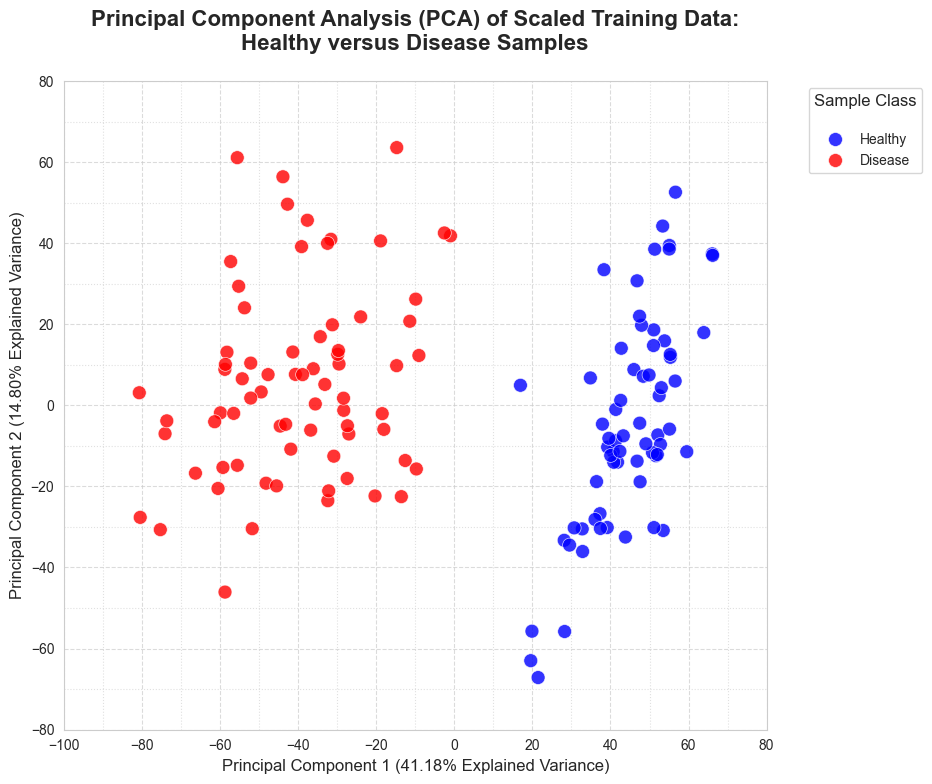

In [15]:
# Use PCA with 2 components for 2D visualisation of the data clusters.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio_pc1 = pca.explained_variance_ratio_[0] * 100
explained_variance_ratio_pc2 = pca.explained_variance_ratio_[1] * 100

pca_df = pd.DataFrame(
    data = X_train_pca,
    columns = ['PC1', 'PC2']
)
pca_df['label'] = y_train.map({0: 'Healthy', 1: 'Disease'}).values

fig_pca, ax_pca = plt.subplots(figsize=(9.5, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='label',
    data=pca_df,
    palette={'Healthy': 'blue', 'Disease': 'red'},
    s=100,
    alpha=0.8,
    edgecolor='w',
    linewidth=0.5,
    ax=ax_pca
)
ax_pca.set_title(
    'Principal Component Analysis (PCA) of Scaled Training Data:\n'
    'Healthy versus Disease Samples\n'
)
ax_pca.set_xlabel(
    f'Principal Component 1 ({explained_variance_ratio_pc1:.2f}% Explained Variance)'
)
ax_pca.set_ylabel(
    f'Principal Component 2 ({explained_variance_ratio_pc2:.2f}% Explained Variance)'
)
ax_pca.set_xlim([-100, 80])
ax_pca.set_ylim([-80, 80])
ax_pca.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax_pca.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax_pca.grid(which='major', axis='both', linestyle='--', alpha=0.7)
ax_pca.grid(which='minor', axis='both', linestyle=':', alpha=0.6)
ax_pca.legend(
    title='Sample Class\n',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title_fontsize=plt.rcParams['axes.labelsize']
)
fig_pca.tight_layout()
fig_pca.savefig(
    'pca_training_data_scatter.pdf',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

##### _p) Save Processed Data for Modelling_

In [16]:
X_train_scaled.to_csv('X_train_scaled.csv')
X_test_scaled.to_csv('X_test_scaled.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')